In [1]:
import numpy as np, cv2
#from sympy.matrices import Matrix
from matplotlib import pyplot as plt
import tensorly as tl

Singular value decomposition: compression

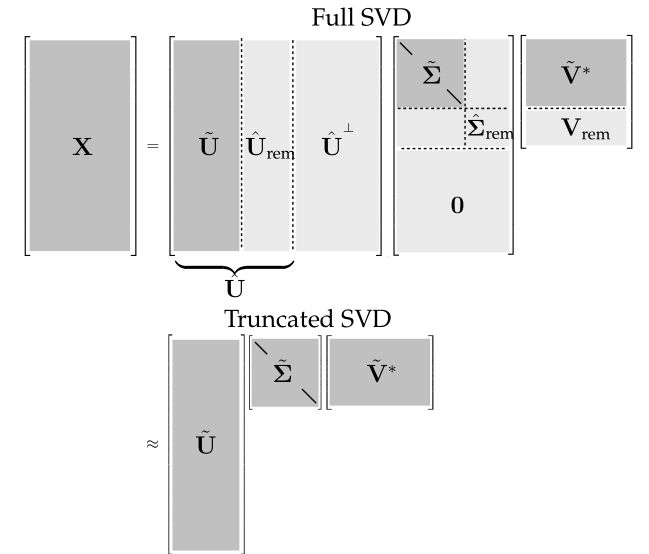

SVD is similar to eigenproblem with sigma containing eigenvalues, which are ordered by weight

full matrix SVD contains zero rows/cols, which dont contribute anything. they can be cut out or SVD can be generated without them

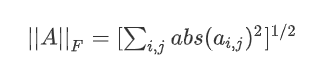

difference between OG matrix and its decomposition can be calculated using Frobenius norm: $np.linalg.norm(matrix, ord = 'fro')$

In [2]:
X = np.random.rand(5,2)

U,S,V = np.linalg.svd(X,full_matrices=True) # S is list of diag elements, not a matrix
print('USV shapes    ', U.shape, np.diag(S).shape, V.shape)

U_hat,S_hat,V_hat = np.linalg.svd(X,full_matrices=False)
print('USV_hat shapes',U_hat.shape, np.diag(S_hat).shape, V_hat.shape)

X_reconstructed = U_hat@np.diag(S_hat) @ V_hat.T
dif_norm = np.linalg.norm(X- X_reconstructed, ord = 'fro')
print(dif_norm)

USV shapes     (5, 5) (2, 2) (2, 2)
USV_hat shapes (5, 2) (2, 2) (2, 2)
6.553857839829632e-16


sigma values and rows of U,V are ordered inhierarchy. first elements have higher contribution to matrix.

by trunkating USV matrices we obtain objects with less information = compressed. where to perform a cutoff?

(2000, 2000) (1500,) (1500, 1500)
OG shape: (2000, 1500) and total # of elements =  3000000
r =  5 ; shapes: (2000, 5) (5, 5) (5, 1500) = 17525 elements in total
r =  20 ; shapes: (2000, 20) (20, 20) (20, 1500) = 70400 elements in total
r =  100 ; shapes: (2000, 100) (100, 100) (100, 1500) = 360000 elements in total


C:\Users\Hot Mexican\AppData\Local\Temp\ipykernel_3544\559775012.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


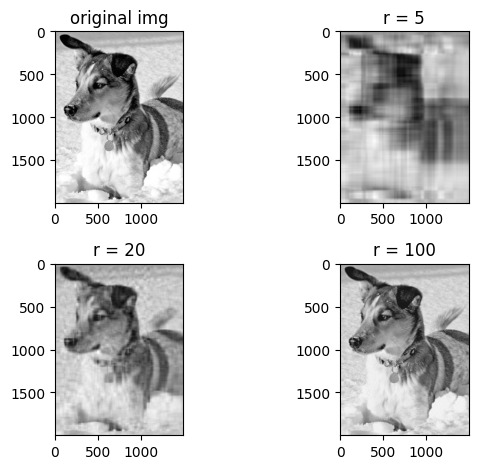

In [15]:
img = np.array(cv2.imread(r'../media/dog.jpg', 0), float)
U,S,V = np.linalg.svd(img,full_matrices=True)
print(U.shape, S.shape, V.shape)
fig, ax = plt.subplots(2,2, layout='constrained')
ax = ax.reshape(ax.size)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original img', fontsize=12)
print('OG shape:', img.shape, 'and total # of elements = ', img.size)
for i,r in enumerate([5, 20, 100]):
    U_trunk = U[:,:r] 
    S_trunk = np.diag(S[:r])
    V_trunk = V[:r,:]
    total_size = U_trunk.size + S_trunk.size + V_trunk.size
    print('r = ', r, '; shapes:', U_trunk.shape, S_trunk.shape, V_trunk.shape, '=', total_size, 'elements in total')
    approx = U_trunk @ S_trunk @ V_trunk
    ax[i + 1].imshow(approx, cmap='gray')
    ax[i + 1].set_title(f'r = {r}', fontsize=12)

plt.tight_layout()
    

Text(0.5, 0, 'r')

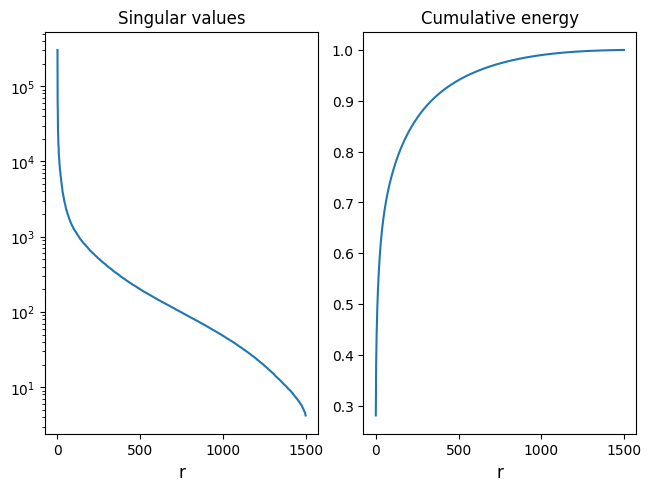

In [4]:
fig, ax2 = plt.subplots(1,2, layout='constrained', sharex=True)
ax2[0].semilogy(S)
ax2[0].set_title('Singular values', fontsize=12)
ax2[0].set_xlabel('r', fontsize=12)
ax2[1].plot(np.cumsum(S)/np.sum(S))
ax2[1].set_title('Cumulative energy', fontsize=12)
ax2[1].set_xlabel('r', fontsize=12)

Singular value decomposition: 1d regression

Because U and V are unitary, they are easily invertible by transposing. Diagonal matrix inversion is even simpler 1/M

We can solve A*x = b easy with this SVD.

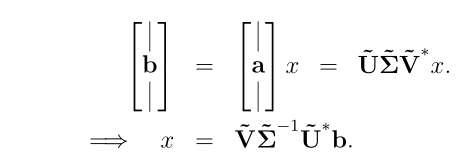

In fact A can be non-square, and you can solve overdetermined as well as underdetermined problems (closest fit)

(16, 1) (1,) (1, 1)


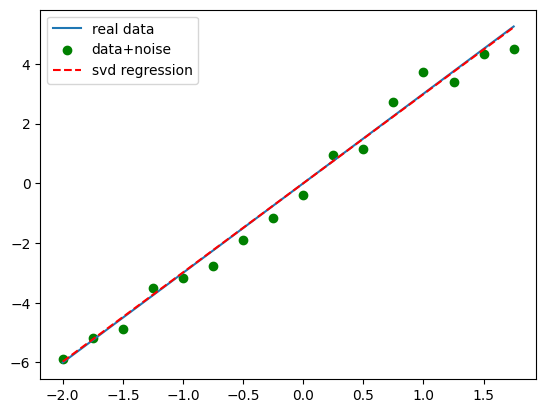

In [5]:
slope = 3
param_a = np.arange(-2.0, 2.0, 0.25)                # domain
param_a = param_a.reshape(-1,1)                     # form a matrix (N,1)
noise = (np.random.rand(*param_a.shape)-0.5)*1.5    # generate noise
param_b = slope*param_a + noise                     # gen linearly related data

U_hat,S_hat,V_hat = np.linalg.svd(param_a,full_matrices=False)
print(U_hat.shape, S_hat.shape, V_hat.shape)
S_hat_inv = (1/np.diag(S_hat))
left_side = V_hat @ S_hat_inv @ U_hat.T
x_prim =  left_side @ param_b

plt.plot(param_a,slope*param_a, label='real data')
plt.scatter(param_a,param_b, c='g',label='data+noise')
plt.plot(param_a,x_prim * param_a, c='r', linestyle='--', label='svd regression')
plt.legend()

Principle Component Analysis (PCA)

[[2. 2. 2.]
 [1. 1. 1.]]
[[ 2.02051696 -1.82819537  0.35119828]
 [-0.43105578 -0.24502138 -0.7598385 ]]


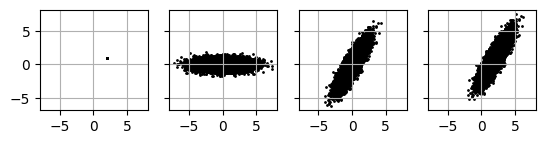

In [6]:
plt.rcParams['axes.grid'] = True
center = np.array([2,1])
scaling = np.array([2,0.5])

theta = np.pi/3
M_rot = np.array([
                    [np.cos(theta),    -np.sin(theta)],
                    [np.sin(theta),     np.cos(theta)]
                ])

num_points = 10000
n_centers = np.diag(center) @ np.ones((2,num_points))                   ; print(n_centers[:,:3])
n_gaussians = np.diag(scaling) @ np.random.normal(size=(2, num_points))  ; print(n_gaussians[:,:3])
n_gauss_rot = M_rot @ n_gaussians
X = n_gauss_rot + n_centers
fig, ax = plt.subplots(1,4, sharex=True, sharey=True)
#ax = ax.reshape(ax.size)
for i, pts in enumerate([n_centers, n_gaussians, n_gauss_rot, X]):
    ax[i].scatter(pts[0,:]    , pts[1,:], s = 1, c = 'k')
    ax[i].set_aspect(1)



Can do SVD on data. have to translate to percieved center.

U-matrix matches rotation matrix M_rot and S values match scaling of gaussian axis

offsets:
 [[1.99573547 1.99573547 1.99573547]
 [0.98233469 0.98233469 0.98233469]]
USV shapes:
 (2, 2) (2,) (2, 10000)

M-rot: 
[[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]]
 U: 
[[-0.49934421 -0.86640369]
 [-0.86640369  0.49934421]]


scaling: 
[2.  0.5]
 S-elems: 
[2.01122957 0.49833647]



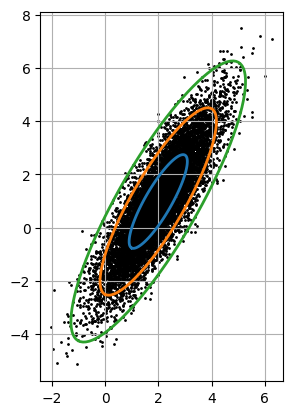

In [7]:
X_avg = np.mean(X,axis=1)
X_offsets = np.diag(X_avg) @ np.ones((2,num_points))     ; print(f'offsets:\n',X_offsets[:,:3])
B = X - X_offsets

U,S,V = np.linalg.svd(B/np.sqrt(num_points), full_matrices=False)
print(f'USV shapes:\n',U.shape, S.shape, V.shape)

print(f'\nM-rot: \n{M_rot}\n U: \n{U}\n')

print(f'\nscaling: \n{scaling}\n S-elems: \n{S}\n')
# draw bands by deforming points forming a circle using S value scales
thetas = 2*np.pi * np.arange(0,1,0.01)
ellipse = np.diag(S) @ np.array([np.cos(thetas), np.sin(thetas)])
# rotate by U, offset to X_avg during plot
X_std = U @ ellipse

fig, ax2 = plt.subplots(1,1, sharex=True, sharey=True)
ax2.scatter(X[0,:]    , X[1,:], s = 1, c= 'k')
for k in [1,2,3]:
    ax2.plot(X_avg[0] + k* X_std[0,:]   , X_avg[1] + k* X_std[1,:], lw= 2)
ax2.set_aspect(1)



truncating. generate problem with known rank (rank = 2). we can then apply theory for cases where noise level is known

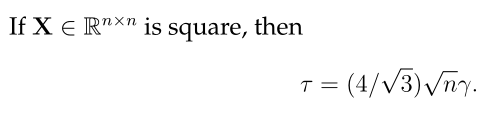

energy at entries r and r + 1 0.8990149226544145 0.9000288604771819


Text(0.5, 1.0, 'trunkated SVD by 90% energy')

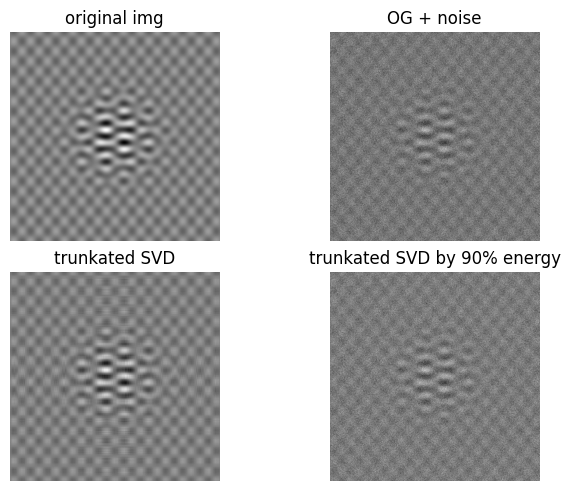

In [8]:
t = np.arange(-3,3,0.01)
Utrue = np.array([
                    np.cos(17*t)*np.exp(-t**2), 
                    np.sin(11*t)
                ])

Strue = np.diag([2, 0.5])

Vtrue = np.array([
                    np.sin(5*t)*np.exp(-t**2),
                    np.cos(13*t)
                ])

X = Utrue.T @ Strue @ Vtrue

fig, ax = plt.subplots(2,2, layout='constrained')
ax = ax.reshape(ax.size)
ax[0].imshow(X, cmap = 'gray')
ax[0].axis('off')
ax[0].set_title('original img', fontsize=12)

gamma = 1;
noise = gamma*np.random.randn(*X.shape)
X_noise = X + noise

ax[1].imshow(X_noise, cmap = 'gray')
ax[1].axis('off')
ax[1].set_title('OG + noise', fontsize=12)

cutoff = (4/np.sqrt(3)) * np.sqrt(t.size) * gamma

U,S,V = np.linalg.svd(X_noise, full_matrices=False)

r = np.max(np.where(S>cutoff)) + 1  # counting form zero
X_trunk = U[:,:r] @ np.diag(S[:r]) @ V[:r,:]

ax[2].imshow(X_trunk, cmap = 'gray')
ax[2].axis('off')
ax[2].set_title('trunkated SVD', fontsize=12)

#cumulative energy
en = np.cumsum(S)/np.sum(S)
r2 = np.max(np.where(en < 0.9))
print('energy at entries r and r + 1',en[r2], en[r2 + 1])
X_90en = U[:,:r2] @ np.diag(S[:r2]) @ V[:r2,:]

ax[3].imshow(X_90en, cmap = 'gray')
ax[3].axis('off')
ax[3].set_title('trunkated SVD by 90% energy', fontsize=12)


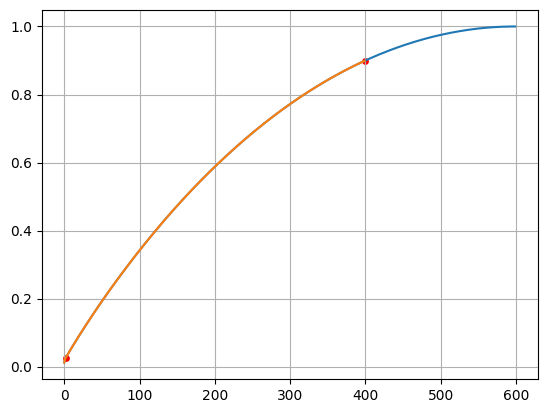

In [9]:
fig, ax = plt.subplots(1,1)
ax.plot(en)
ax.plot(en[:r2+1])
ax.scatter([r], [en[r]], s = 15, c = 'r')
ax.scatter([r2], [en[r2]], s = 15,  c = 'r')


data for SVD should be well aligned. for example pictures of faces should be cropped so different features have same relative position

in this example we generate a rank 2 matrix (2 independent columns)

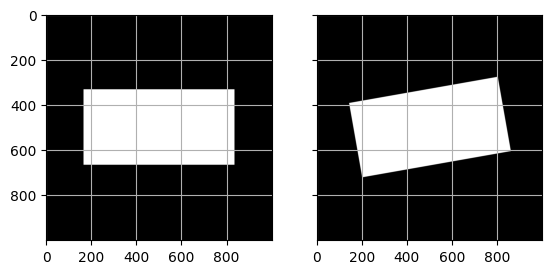

In [10]:
n = 1000

forth = n//3
sixt = n//6

# OG way
X = np.zeros((n,n))
X[forth:-forth,forth:-forth] = 1

# using outer product of eigen vectors 
rowX = np.zeros(n)
rowX[forth:-forth] = 1
colY = np.zeros(n)
colY[sixt:-sixt] = 1

X = np.outer(rowX,colY)

M_rot_img = cv2.getRotationMatrix2D((n//2, n//2), 10, 1.0)
X_rot = cv2.warpAffine(X, M_rot_img, X.shape)
fig, ax = plt.subplots(1,2, sharex=True, sharey=True)
ax[0].imshow(X      , cmap='gray')
ax[1].imshow(X_rot  , cmap='gray')

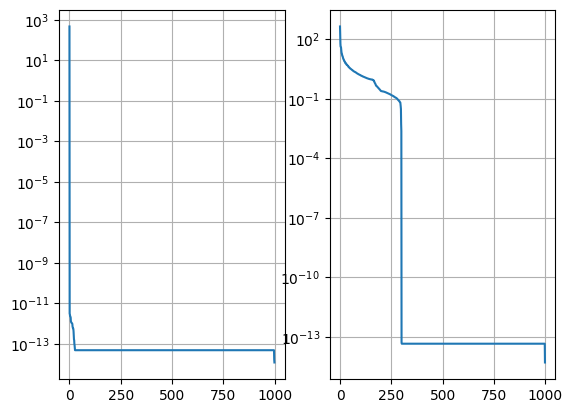

In [11]:
U,S,V       = np.linalg.svd(X       , full_matrices=True)
U2,S2,V2    = np.linalg.svd(X_rot   , full_matrices=True)
fig, ax = plt.subplots(1,2, sharex=True, sharey=False)
ax[0].semilogy(S)
ax[1].semilogy(S2)

In [12]:
def rsvd(X,r,q,p):
    # Step 1: Sample column space of X with P matrix
    ny = X.shape[1]
    P = np.random.normal(size=(ny, r+p))
    Z = X @ P
    for _ in np.arange(1,q):
        Z = X @ (X.T @ Z)

    Q, R = np.linalg.qr(Z, 'reduced')
    
    # Step 2: Compute SVD on projected Y=Q.T*X
    Y = Q.T @ X
    UY,S,V       = np.linalg.svd(Y, full_matrices=False)
    U = Q @ UY
    return U, S, V

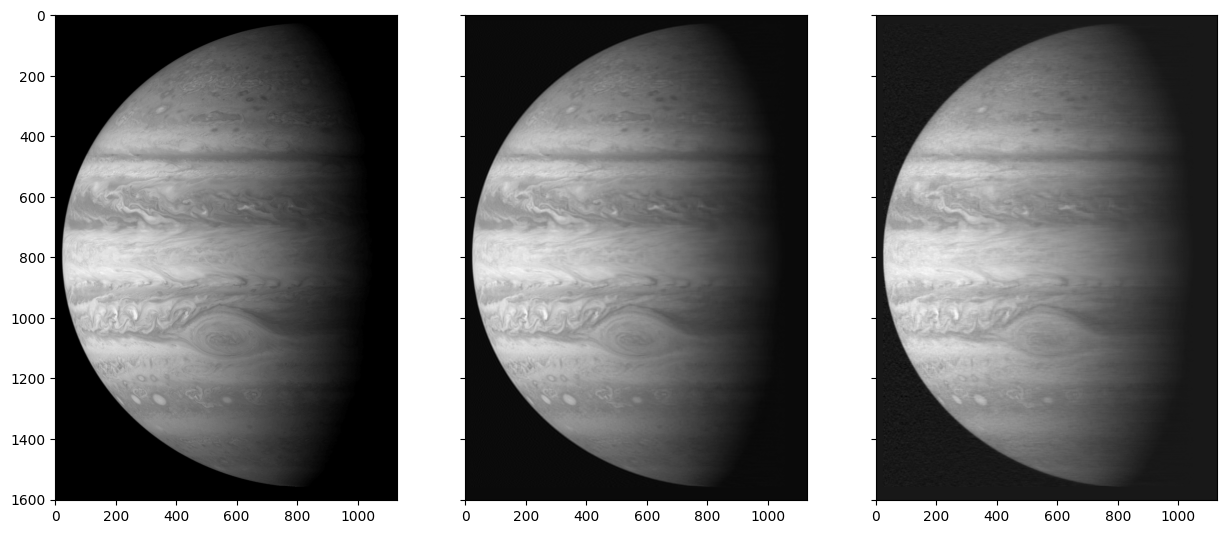

In [17]:
plt.rcParams['axes.grid'] = False
A       = cv2.imread(r'../media/jupiter.png',0)
X       = np.array(A, float)
U,S,V   = np.linalg.svd(X, full_matrices=False)

r = 100 # Target rank
q = 1   # Power iterations
p = 5   # Oversampling parameter

rU, rS, rV = rsvd(X,r,q,p)

XSVD = U[:,:r] @ np.diag(S[:r]) @ V[:r,:]
#errSVD = np.linalg.norm(X - XSVD, axis = 1)/np.linalg.norm(X, axis = 1)
XrSVD = rU[:,:r] @ np.diag(rS[:r]) @ rV[:r,:]

fig, ax = plt.subplots(1,3, sharex=True, sharey=True, figsize=(15, 15))
for k, img in enumerate([X,XSVD, XrSVD]):
    ax[k].imshow(img, cmap='gray')

